In [2]:
from google.colab import files
files.upload() # kaggle.jsonをアップロード
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


  0% 0.00/2.45M [00:00<?, ?B/s]
100% 2.45M/2.45M [00:00<00:00, 82.0MB/s]
Archive:  youtube-trend-with-subscriber.zip
  inflating: USvideos_modified.csv   
標準化(StandardScaler)
[[ 0.40238477  0.28708414]
 [ 0.78930756  1.07028894]
 [ 1.04326681  0.89485919]
 ...
 [-0.2519021  -0.26749594]
 [-0.25846716 -0.26894789]
 [-0.24089929 -0.2484469 ]]
正規化(MinMaxScaler)
[[4.76105159e-03 1.62671308e-02]
 [6.87282761e-03 1.45566180e-02]
 [4.34657971e-03 7.33706429e-03]
 ...
 [2.09027604e-05 4.56087780e-04]
 [1.01527693e-05 2.57054305e-04]
 [1.32583223e-04 6.30150267e-04]]


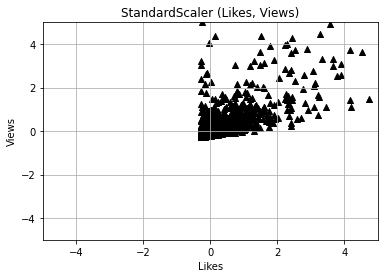

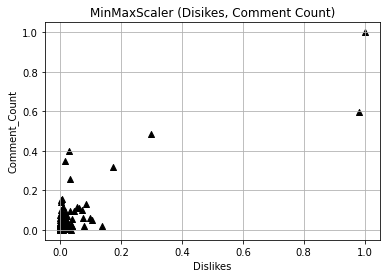

In [4]:
import pandas as pd
# 標準化および正規化用のクラスをインポート
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# グラフ描画用ライブラリをインポート
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# データの準備（Kaggle API を用いたデータのダウンロード）
!kaggle datasets download -d \
sgonkaggle/youtube-trend-with-subscriber
!unzip youtube-trend-with-subscriber.zip

# CSVファイルを読み込んでデータフレームに格納
df = pd.read_csv('USvideos_modified.csv')
# データフレームから特定の列のみを抽出
# 視聴回数、コメント数など
data = df.loc[:,['views', 'likes', 
                 'dislikes', 'comment_count']]
# likesとviewsを標準化
print('標準化(StandardScaler)')
sc = StandardScaler()
data_std = sc.fit_transform(data.loc[:,['likes', 'views']])
print(data_std)
# 標準化したデータでlikesとviewsの関係を可視化
plt.figure()
plt.title('StandardScaler (Likes, Views)')
# 横軸の範囲を-5.0から5.0に設定
plt.xlim((-5.0, 5.0))
# 縦軸の範囲を-5.0から5.0に設定
plt.ylim((-5.0, 5.0))

# 標準化したlikesとviewsを縦軸、横軸として散布図を描画
plt.scatter(data_std[:,0], data_std[:,1], 
color='k', marker='^')
plt.xlabel('Likes')
plt.ylabel('Views')
plt.grid()
plt.savefig('3.1_standard_scaler.png', dpi=500)

# 正規化（デフォルトでは、最小値0、最大値1に正規化）
print('正規化(MinMaxScaler)') 
ms = MinMaxScaler()
data_norm = ms.fit_transform(data.loc[:, ['dislikes',
 'comment_count']])
print(data_norm)
# 正規化したデータでdislikesとcomment_countの関係を可視化
plt.figure()
plt.title('MinMaxScaler (Disikes, Comment Count)')
plt.scatter(data_norm[:,0], data_norm[:,1], 
color='k', marker='^')
plt.xlabel('Dislikes')
plt.ylabel('Comment_Count')
plt.grid()
plt.savefig('3.1_minmax_scaler.png', dpi=500)